# K-Means Clustering Algorithm: Tutorial

In [1]:
# first, we import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## A Standard K-Means Clustering Example
(Inspired by an article originally published on r-posts.com https://r-posts.com/exploring-assumptions-of-k-means-clustering-using-r/)

In [2]:
df = pd.read_csv('data/faithful.csv')
df

,eruption,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


let's visualize the data

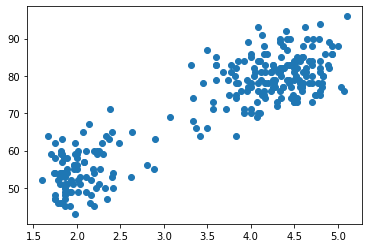

In [3]:
plt.scatter(df['eruption'], df['waiting'])

In [4]:
X = df.values
X

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


documentation for the KMeans model in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [15]:
kmeans = KMeans(n_clusters = 2,
                init = 'random',
                max_iter = 300,)

In [16]:
kmeans.fit(X)

KMeans(init='random', n_clusters=2)

so, what was the result of our fit?

In [20]:
flags = kmeans.labels_

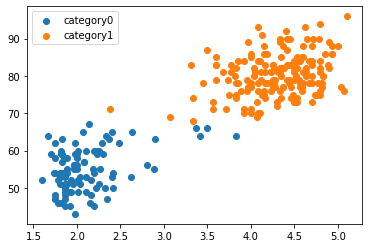

In [22]:
category0 = df[flags == 0]
category1 = df[flags == 1]

plt.scatter(category0['eruption'], category0['waiting'], label='category0')
plt.scatter(category1['eruption'], category1['waiting'], label='category1')

plt.legend()

Now, imagine we see a new eruption! This one lasts for **3 minutes** and came **75.2 minutes** after the previous eruption. What category is it in?

In [23]:
new_eruption = 3
new_waiting = 75.2

kmeans.predict([[new_eruption, new_waiting]])

array([1], dtype=int32)

## A non-spherical clustering example
Generally speaking, k-means clustering relies on data to be clustered in spherical groups. What happens if we have a non-spherical example?

Let's pretend that this (fake) data, which we will import from 'bulls_eye.csv', is from hits to a bull's eye from your school's archery team practice. Only one problem... *the target is missing!*

In [25]:
df = pd.read_csv('data/bulls_eye.csv')[['x', 'y']]
df

,x,y
0,-0.420139,-0.009825
1,-0.056035,0.158766
2,0.694156,-0.563173
3,-0.291152,0.195805
4,0.022523,-0.187408
...,...,...
2995,2.682259,-5.231673
2996,-5.603873,-0.663559
2997,5.224298,-2.026213
2998,-2.991822,5.143475


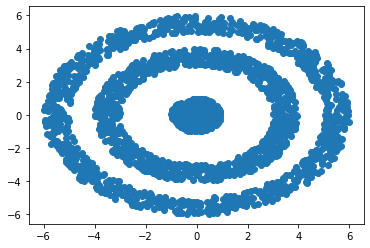

In [26]:
plt.scatter(df['x'], df['y'])

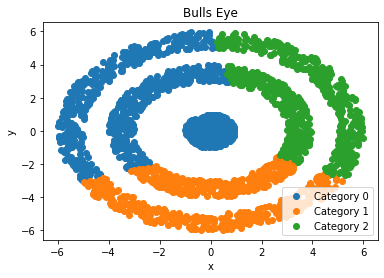

In [27]:
kmeans = KMeans(n_clusters=3, # we have three target regions
                init = 'random',
                max_iter = 300,
                )
kmeans.fit(df.values)
flags = kmeans.labels_
category0 = df[flags == 0] # creating a mask that filters for only category 0
category1 = df[flags == 1] # creating a mask that filters for only category 1
category2 = df[flags == 2] # creating a mask that filters for only category 2

# plotting the categories
plt.scatter(category0['x'], category0['y'], label = 'Category 0')
plt.scatter(category1['x'], category1['y'], label = 'Category 1')
plt.scatter(category2['x'], category2['y'], label = 'Category 2')

plt.title('Bulls Eye')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'lower right')

that's not what we want! can you think of a way to transform our data to take advantage of the k-means clustering algorithm?

In [28]:
df['r'] = (df['x']**2 + df['y']**2)**0.5
df

,x,y,r
0,-0.420139,-0.009825,0.420254
1,-0.056035,0.158766,0.168364
2,0.694156,-0.563173,0.893877
3,-0.291152,0.195805,0.350869
4,0.022523,-0.187408,0.188756
...,...,...,...
2995,2.682259,-5.231673,5.879194
2996,-5.603873,-0.663559,5.643022
2997,5.224298,-2.026213,5.603466
2998,-2.991822,5.143475,5.950322


In [29]:
df['theta'] = np.arcsin(df['y'] / df['r']) # theta = arcsin(y/r)
df

,x,y,r,theta
0,-0.420139,-0.009825,0.420254,-0.023380
1,-0.056035,0.158766,0.168364,1.231504
2,0.694156,-0.563173,0.893877,-0.681597
3,-0.291152,0.195805,0.350869,0.592043
4,0.022523,-0.187408,0.188756,-1.451190
...,...,...,...,...
2995,2.682259,-5.231673,5.879194,-1.097043
2996,-5.603873,-0.663559,5.643022,-0.117862
2997,5.224298,-2.026213,5.603466,-0.369983
2998,-2.991822,5.143475,5.950322,1.043961


Congratulations! Now, you're now officially a k-means clusterer!